## [作業重點]
目前你應該已經要很清楚資料集中，資料的型態是什麼樣子囉！包含特徵 (features) 與標籤 (labels)。因此要記得未來不管什麼專案，必須要把資料清理成相同的格式，才能送進模型訓練。
今天的作業開始踏入決策樹這個非常重要的模型，請務必確保你理解模型中每個超參數的意思，並試著調整看看，對最終預測結果的影響為何

## 作業

1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

In [77]:
from sklearn import datasets, metrics
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import numpy as np

In [88]:
data = datasets.load_iris()
x_train, x_test, y_train, y_test = train_test_split(data.data,data.target,test_size=0.25,random_state=4)
dtc1 = DecisionTreeClassifier(
    criterion ='entropy',
    max_depth = 2,
    min_samples_split = 2,
    min_samples_leaf =34,
)
dtc2 = DecisionTreeClassifier(
    criterion ='gini',
    max_depth = 2,
    min_samples_split = 2,
    min_samples_leaf =34,
)
dtc1.fit(x_train,y_train)
y_pred = dtc1.predict(x_test)
dtc2.fit(x_train,y_train)
y_pred = dtc2.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)

Acuuracy:  0.9473684210526315


In [60]:
wine = datasets.load_wine()
x_train,x_test,y_train,y_test = train_test_split(wine.data,wine.target,test_size=0.25,random_state=4)
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
y_pred = dtr.predict(x_test)
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

Mean squared error: 0.02


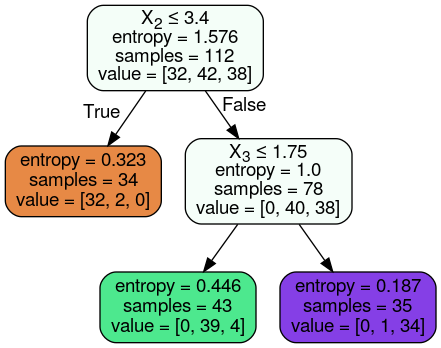

In [89]:
#iris entropy
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dtc1, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

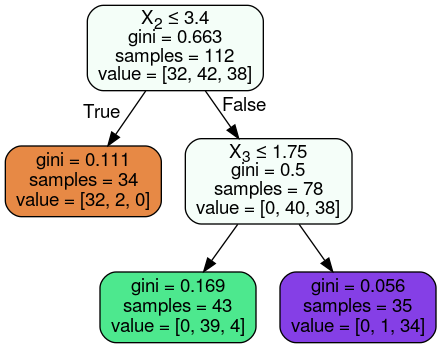

In [91]:
#iris gini
dot_data = StringIO()
export_graphviz(dtc2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

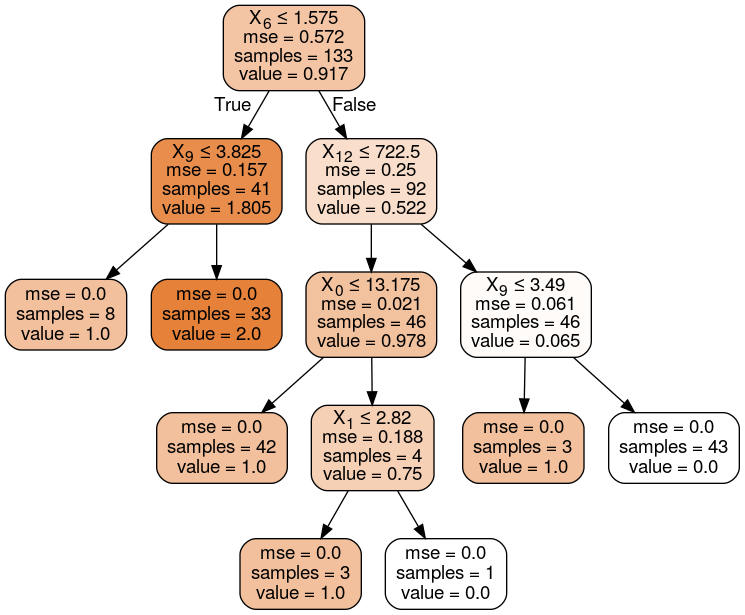

In [93]:
#wine
dot_data = StringIO()
export_graphviz(dtr, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())